In [1]:
import torch 
import pandas as pd
import sys
sys.path.append("../")



In [2]:
from utils.logdata_handler import parse_log_file

In [6]:
df1 = parse_log_file("/home/user/project/worms/python/rmsKit/optimizer_output/2024-05-16_07-30-06_7802511234778845037.log")
df2 = parse_log_file("/home/user/project/worms/python/rmsKit/optimizer_output/2024-05-16_07-25-24_1203876843867906931.log")

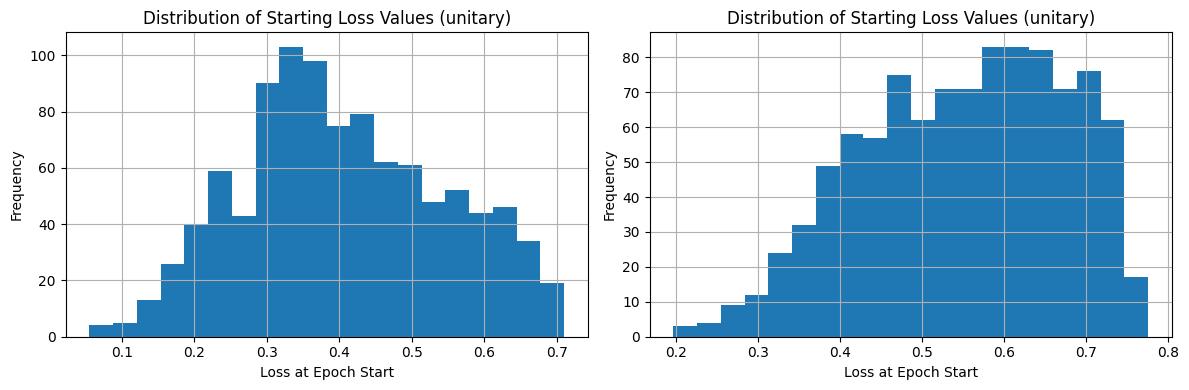

In [7]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df1['Loss at Epoch Start'].hist(bins=20, ax=ax1)
ax1.set_xlabel('Loss at Epoch Start')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Starting Loss Values (unitary)')

df2['Loss at Epoch Start'].hist(bins=20, ax=ax2)
ax2.set_xlabel('Loss at Epoch Start')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Starting Loss Values (unitary)')

plt.tight_layout()
plt.show()


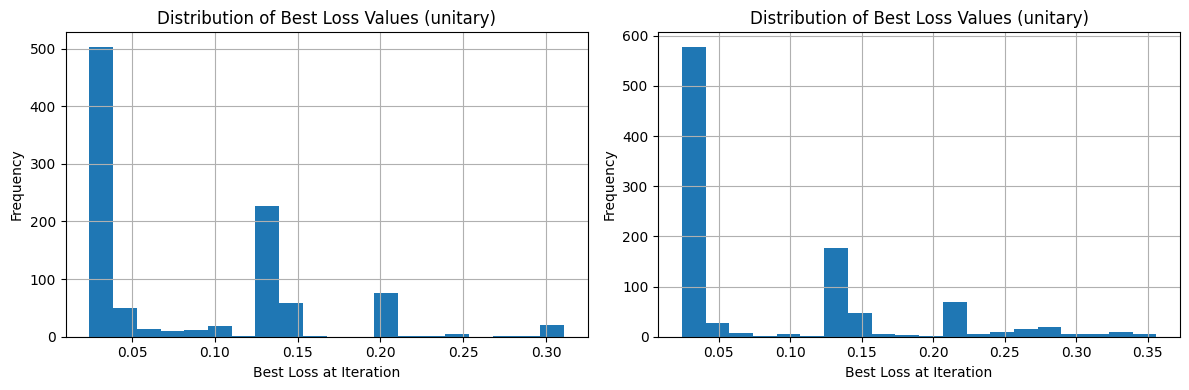

In [8]:

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df1['Best Loss at Iteration'].hist(bins=20, ax=ax1)
ax1.set_xlabel('Best Loss at Iteration')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Best Loss Values (orthogonal)')

df2['Best Loss at Iteration'].hist(bins=20, ax=ax2)
ax2.set_xlabel('Best Loss at Iteration')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Best Loss Values (unitary)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9341/3861813766.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(combined_data, labels=['orthogonal', 'unitary'], patch_artist=True)


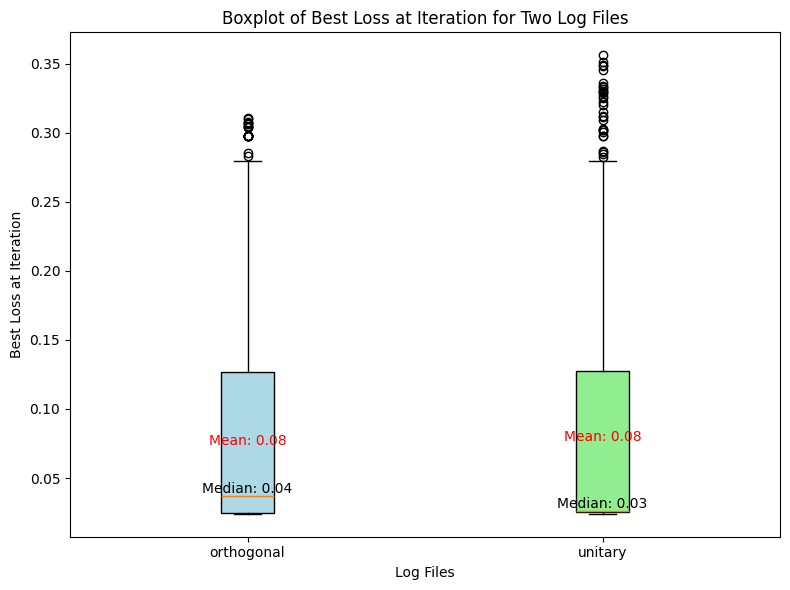

In [12]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(figsize=(8, 6))

combined_data = [df1['Best Loss at Iteration'], df2['Best Loss at Iteration']]
box = ax.boxplot(combined_data, labels=['orthogonal', 'unitary'], patch_artist=True)

# Adding colors to box plots
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding explanation of the box plot
for i, data in enumerate(combined_data, start=1):
    median = np.median(data)
    ax.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black')

ax.set_xlabel('Log Files')
ax.set_ylabel('Best Loss at Iteration')
ax.set_title('Boxplot of Best Loss at Iteration for orthogonal vs unitary')

plt.tight_layout()
plt.show()


In [36]:
E.max(dim=1)

torch.return_types.max(
values=tensor([2.6642, 3.4364, 3.7428, 3.5257], dtype=torch.float64),
indices=tensor([2, 2, 2, 2]))